## Importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import networkx as nx
import csv, sys
import time


%matplotlib inline

## Network Setup

Network has 30 nodes
Network has 34 edges
Finding SP from 12 to 1


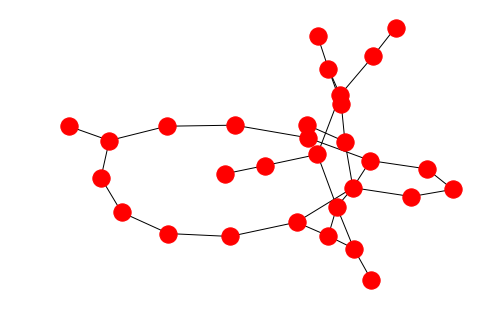

In [2]:
G=nx.Graph()
G.add_nodes_from(list(range(1,30)))
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(2, 5)
G.add_edge(3, 5)
G.add_edge(3, 4)
G.add_edge(2, 20)
G.add_edge(6, 20)
G.add_edge(5, 6)
#.add_edge(6, 10)
G.add_edge(6, 7)
G.add_edge(7, 8)
G.add_edge(8, 9)
G.add_edge(9, 10)
G.add_edge(10, 11)
G.add_edge(11, 12)
G.add_edge(11, 13)
G.add_edge(13, 14)
G.add_edge(14, 15)
G.add_edge(15, 16)
G.add_edge(16, 17)
G.add_edge(17, 18)
G.add_edge(18, 19)
G.add_edge(19, 20)
#.add_edge(17, 22)
G.add_edge(16, 20)
G.add_edge(20, 21)
G.add_edge(21, 22)
#.add_edge(22, 1)
G.add_edge(21, 23)
G.add_edge(23, 24)
G.add_edge(24, 26)
G.add_edge(26, 1)
G.add_edge(1, 29)
G.add_edge(29, 30)
G.add_edge(24, 25)
G.add_edge(26, 27)
G.add_edge(27, 28)

nodes = len(G.nodes())
edges = len(G.edges())
print("Network has {} nodes".format(nodes))
print("Network has {} edges".format(edges))

source = 12
target = 1
print("Finding SP from {} to {}".format(source, target))

nx.draw(G)
plt.show()

## Generating Data

### Randomizing Input Weights

In [11]:
gigabit_max_packet_size = 1518 + 12 + 8 # Ethernet Frame + Interframe Gap + Preamble
gigabit_max_throughput = 125 * 1e6 # 1000 MB/s
gigabit_min_throughput = 1e2       # 100 bytes/s
f_min = gigabit_max_packet_size / gigabit_max_throughput
f_max = gigabit_max_packet_size / gigabit_min_throughput

print('Max througtput: ' + str(gigabit_max_throughput))
print('Min througtput: ' + str(gigabit_min_throughput))
print('f max: ' + str(f_max))
print('f min: ' + str(f_min))

def generate_example_inputs(G):
    throughputs = []
    for edge in G.edges():
        i, j = edge
        throughput = np.random.uniform(gigabit_min_throughput, gigabit_max_throughput)
        G[i][j]['weight'] = gigabit_max_packet_size / throughput
        throughputs.append(throughput)
    return throughputs



Max througtput: 125000000.0
Min througtput: 100.0
f max: 15.38
f min: 1.2304e-05


### Calculating Correct Path Output

In [12]:
def generate_example_output(G):
    dijkstra = nx.bidirectional_dijkstra(G, source=source, target=target)
    node_path_list = dijkstra[1]
    edge_path = nodes_to_edges(node_path_list)
    path_vector = route_to_vec(edge_path)
    return path_vector

def route_to_vec(route):
    path_vector = [0] * edges
    for edge in route:
        sorted_edge = tuple(sorted(edge))
        edge_indx = edge_index[sorted_edge]
        path_vector[edge_indx] = 1
    return path_vector

def nodes_to_edges(node_route):
    edges = []
    y = node_route[0]
    for i in range(1, len(node_route)):
        x = y
        y = node_route[i]
        edge = (x, y)
        edges.append(edge)
    return edges

GG = list(G.edges())
edge_index = dict((GG[value], value) for value in range(len(GG)))

In [13]:
def generate_example():
    x = generate_example_inputs(G)
    y = generate_example_output(G)
    return (x,y)

m = 14
vm = 14
tm = 14

print("Generating {} examples".format(m))

data = []
labels = []

for i in range(m):
    x, y = generate_example()
    data.append(x)
    labels.append(y)

Generating 14 examples


### Dataset alanysis

All possible routes from 12 to 1
Route 0 => [12, 11, 13, 14, 15, 16, 20, 2, 1]
Route 1 => [12, 11, 10, 9, 8, 7, 6, 20, 2, 1]
Route 2 => [12, 11, 10, 9, 8, 7, 6, 5, 2, 1]
Route 3 => [12, 11, 10, 9, 8, 7, 6, 5, 3, 2, 1]
Route 4 => [12, 11, 13, 14, 15, 16, 20, 6, 5, 2, 1]
Route 5 => [12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 2, 1]
Route 6 => [12, 11, 13, 14, 15, 16, 20, 21, 23, 24, 26, 1]
Route 7 => [12, 11, 13, 14, 15, 16, 20, 6, 5, 3, 2, 1]
Route 8 => [12, 11, 10, 9, 8, 7, 6, 20, 21, 23, 24, 26, 1]
Route 9 => [12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 6, 5, 2, 1]
Route 10 => [12, 11, 10, 9, 8, 7, 6, 5, 2, 20, 21, 23, 24, 26, 1]
Route 11 => [12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 26, 1]
Route 12 => [12, 11, 13, 14, 15, 16, 17, 18, 19, 20, 6, 5, 3, 2, 1]
Route 13 => [12, 11, 10, 9, 8, 7, 6, 5, 3, 2, 20, 21, 23, 24, 26, 1]
Route 0 has 1 examples in dataset
Route 1 has 0 examples in dataset
Route 2 has 1 examples in dataset
Route 3 has 0 examples in dataset
Route 4 has 3 examples i

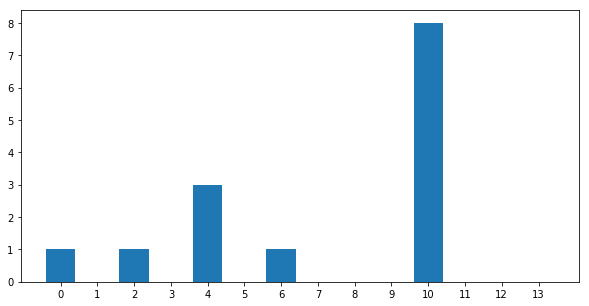

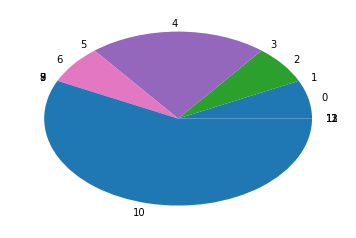

In [14]:
unique_routes = list(nx.all_simple_paths(G, source=source, target=target))
unique_routes_edges = [nodes_to_edges(i) for i in unique_routes]
unique_route_vecs = dict()
unique_routes_cnt = len(unique_routes)
for r in range(unique_routes_cnt):
    route = unique_routes_edges[r]
    route_vec = tuple(route_to_vec(route))
    unique_route_vecs[route_vec] = r

unique_routes.sort(key=len)
print("All possible routes from {} to {}".format(source, target))
for r in range(len(unique_route_vecs)):
    print("Route {} => {}".format(r, list(unique_routes)[r]))

def analyze_dataset(G, labels):
    route_ids = []
    route_counts = [0] * len(unique_routes)
    for i in range(m):
        l = tuple(labels[i])
        r_id = unique_route_vecs[l]
        route_ids.append(r_id)    
        route_counts[r_id] += 1

    for i in range(len(unique_routes)):
        print("Route {} has {} examples in dataset".format(i, route_counts[i]))

    fig, ax = plt.subplots()
    bins = list(range(0, 14))
    plt.bar(bins, route_counts)
    ax.set_xticks([i for i in bins])
    ax.set_xticklabels(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'))
    fig.set_size_inches(10,5)
    plt.show()

    plt.pie(route_counts, labels=bins)
    plt.show()
    
analyze_dataset(G, labels)

### Generating Normalized Dataset

In [10]:
def generate_dataset(m):
    cnt = [0] * unique_routes_cnt
    examples_per_route = m // unique_routes_cnt
    print('Generating {} examples per route'.format(examples_per_route))
    new_datas = []
    new_labels = []
    i = 0
    start = time.time()
    while True:
        new_data, new_label = generate_example()

        route_type = unique_route_vecs[tuple(new_label)]
        if cnt[route_type] < examples_per_route:
            new_datas.append(new_data)
            new_labels.append(new_label)
            cnt[route_type] += 1

        if len(new_datas) >= m:
            break

        i += 1
        if i % 100000 == 0:
            time_passed = time.time() - start
            start = time.time()
            print([time_passed, i, cnt, len(new_datas) / m])
    return (new_datas, new_labels)

train_data, train_labels = generate_dataset(m)
validation_data, validation_labels = generate_dataset(vm)
test_data, test_labels = generate_dataset(tm)

Generating 1 examples per route
[48.127549171447754, 100000, [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], 0.9285714285714286]
[48.38054585456848, 200000, [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], 0.9285714285714286]
[48.49070978164673, 300000, [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], 0.9285714285714286]
Generating 1 examples per route
Generating 1 examples per route


Route 0 has 1 examples in dataset
Route 1 has 1 examples in dataset
Route 2 has 1 examples in dataset
Route 3 has 1 examples in dataset
Route 4 has 1 examples in dataset
Route 5 has 1 examples in dataset
Route 6 has 1 examples in dataset
Route 7 has 1 examples in dataset
Route 8 has 1 examples in dataset
Route 9 has 1 examples in dataset
Route 10 has 1 examples in dataset
Route 11 has 1 examples in dataset
Route 12 has 1 examples in dataset
Route 13 has 1 examples in dataset


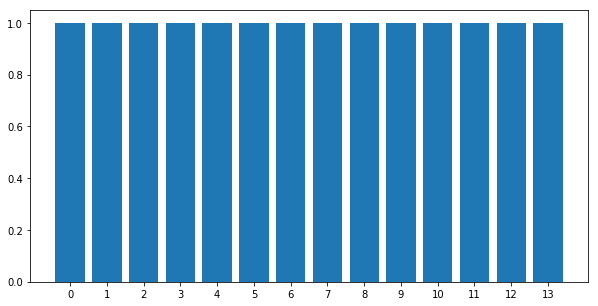

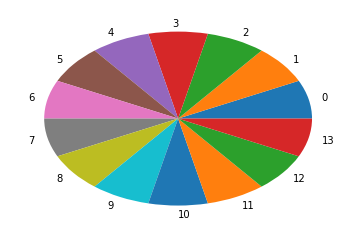

In [11]:
analyze_dataset(G, train_labels)

### Save Dataset to CSV

In [10]:
# with open('train_dataset_140.csv', 'w', newline='') as f:
#     writer = csv.writer(f)
#     for i in range(m):
#         example = train_data[i] + train_labels[i]
#         writer.writerow(example)

# with open('validation_dataset2.csv', 'w', newline='') as f:
#     writer = csv.writer(f)
#     for i in range(vm):
#         example = validation_data[i] + validation_labels[i]
#         writer.writerow(example)

# with open('test_dataset2.csv', 'w', newline='') as f:
#     writer = csv.writer(f)
#     for i in range(tm):
#         example = test_data[i] + test_labels[i]
#         writer.writerow(example)

In [22]:
with open('valid_routes.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for r in list(unique_route_vecs):
        writer.writerow(r)

(1, 2)
(2, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
(9, 10)
(10, 11)
(11, 12)


True